In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential, model_from_json
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image
from pathlib import Path
import numpy as np

In [2]:
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

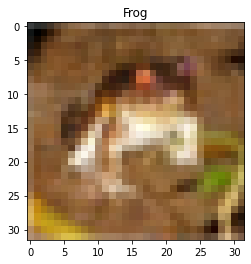

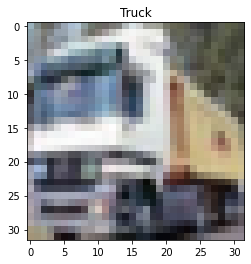

In [3]:
import matplotlib.pyplot as plt
for i in range(2):
    sample_image = x_train[i]
    image_class_number = y_train[i][0]
    image_class_name = cifar10_class_names[image_class_number]
    plt.imshow(sample_image)
    plt.title(image_class_name)
    plt.show()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [7]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=7,
    validation_data=(x_test, y_test),
    shuffle=True
)

2022-09-30 16:05:49.782382: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/7
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5403 - accuracy: 0.4402 - val_loss: 1.2047 - val_accuracy: 0.5611
Epoch 2/7
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1661 - accuracy: 0.5857 - val_loss: 1.0273 - val_accuracy: 0.6354
Epoch 3/7
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0165 - accuracy: 0.6433 - val_loss: 0.8792 - val_accuracy: 0.6896
Epoch 4/7
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9107 - accuracy: 0.6809 - val_loss: 0.8581 - val_accuracy: 0.6998
Epoch 5/7
1563/1563 [==============================] - 51s 32ms/step - loss: 0.8486 - accuracy: 0.7003 - val_loss: 0.7654 - val_accuracy: 0.7381
Epoch 6/7
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7979 - accuracy: 0.7216 - val_loss: 0.7396 - val_accuracy: 0.7423
Epoch 7/7
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7594 - accuracy: 0.7351 - val_loss: 0.7506 - val_ac

In [8]:
model_structure = model.to_json()
f = Path('model_structure.json')
f.write_text(model_structure)
model.save_weights('model_weights.h5')

In [9]:
f = Path('model_structure.json')
model_structure = f.read_text()
model = model_from_json(model_structure)
model.load_weights('model_weights.h5')

In [10]:
img = image.load_img('cat.png', target_size=(32,32))
image_to_test = image.img_to_array(img) / 255
list_of_images = np.expand_dims(image_to_test, axis=0)
results = model.predict(list_of_images)
single_result = results[0]
most_likely_class_index = int(np.argmax(single_result))
class_likehood = single_result[most_likely_class_index]
class_label = cifar10_class_names[most_likely_class_index]

In [11]:
print("Esta imagen es de un {} - con una probabilidad de: {:2f}".format(class_label, class_likehood))

Esta imagen es de un Cat - con una probabilidad de: 0.632276
